In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('ML471_S3_Datafile_Practice.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume,Close_diff,SMA_10,SMA_30,SES
Date,,,,,,,,,
2006-01-31,34.854000,35.166500,34.524500,34.818000,3777774.800,NaN,NaN,NaN,34.818000
2006-02-28,35.901579,36.162105,35.671579,35.908947,4196577.053,1.090947,NaN,NaN,34.818000
2006-03-31,34.624783,34.889130,34.453478,34.671304,3952055.652,-1.237643,NaN,NaN,35.036189
2006-04-30,34.625263,34.901053,34.386316,34.687368,3888881.000,0.016064,NaN,NaN,34.963212
2006-05-31,34.499545,34.672273,34.185000,34.386818,4088439.591,-0.300550,NaN,NaN,34.908044


In [3]:
# Split the data
train_size = 110
train, test = df.iloc[:train_size], df.iloc[train_size:]

# Fit ARIMA(1,1,1) model
model = ARIMA(train['Close'], order=(1, 1, 1))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))
test['Forecast'] = forecast.values

# Calculate residuals
test['Residuals'] = test['Close'] - test['Forecast']

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")

Train size: 110
Test size: 22


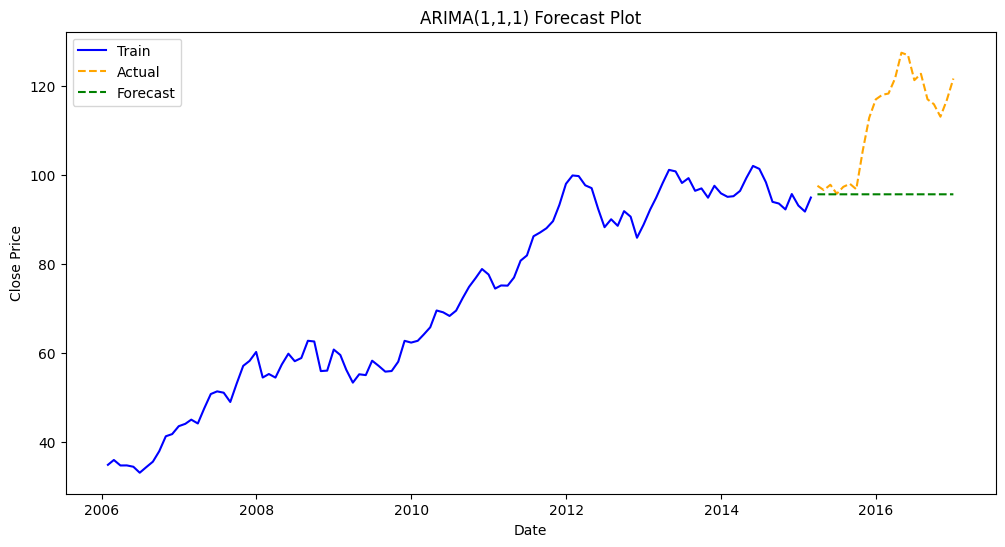

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train', color='blue')
plt.plot(test.index, test['Close'], label='Actual', color='orange', linestyle='--')
plt.plot(test.index, test['Forecast'], label='Forecast', color='green', linestyle='--')
plt.title('ARIMA(1,1,1) Forecast Plot')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

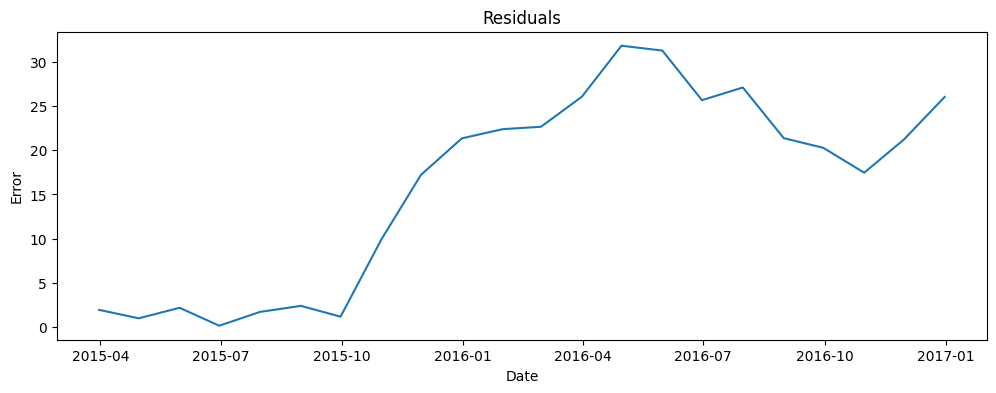

In [5]:
plt.figure(figsize=(12, 4))
plt.plot(test.index, test['Residuals'], color='tab:blue')
plt.title('Residuals')
plt.xlabel('Date')
plt.ylabel('Error')
plt.show()

In [6]:
mae = mean_absolute_error(test['Close'], test['Forecast'])
rmse = np.sqrt(mean_squared_error(test['Close'], test['Forecast']))
mape = np.mean(np.abs((test['Close'] - test['Forecast']) / test['Close'])) * 100

print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAPE: {mape:.4f}%")

MAE: 16.0118
RMSE: 19.3723
MAPE: 13.4805%
